In [3]:
import pandas as pd

# Specify the encoding parameter
df = pd.read_csv('World Population.csv', encoding='latin1')  # Change 'latin1' to the appropriate encoding if needed


In [4]:
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [5]:
df.tail()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El AaiÃºn,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25
233,74,ZWE,Zimbabwe,Harare,Africa,16320537,15669666,14154937,12839771,11834676,10113893,7049926,5202918,390757,41.7665,1.0204,0.20


In [6]:
print(df.columns)


Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')


In [7]:
df.isnull().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [8]:
df.dtypes

Rank                             int64
CCA3                            object
Country/Territory               object
Capital                         object
Continent                       object
2022 Population                  int64
2020 Population                  int64
2015 Population                  int64
2010 Population                  int64
2000 Population                  int64
1990 Population                  int64
1980 Population                  int64
1970 Population                  int64
Area (km²)                       int64
Density (per km²)              float64
Growth Rate                    float64
World Population Percentage    float64
dtype: object

In [9]:
df['Continent'].value_counts()

Continent
Africa           57
Asia             50
Europe           50
North America    40
Oceania          23
South America    14
Name: count, dtype: int64

In [10]:
df['Country/Territory'].nunique()

234

In [11]:
max_countrys=[]
max_populations=[]
columns=['2022 Population','2020 Population','2015 Population','2010 Population','2000 Population','1990 Population','1980 Population','1970 Population']
for year in columns:
    max_country = df.loc[df[year].idxmax()]['Country/Territory']
    max_population = df[year].max()
    max_countrys.append(max_country)
    max_populations.append(max_population)

columns_reversed = columns[::-1]
#columns.reverse()

In [12]:
print(max_countrys)
print(max_populations)

['China', 'China', 'China', 'China', 'China', 'China', 'China', 'China']
[1425887337, 1424929781, 1393715448, 1348191368, 1264099069, 1153704252, 982372466, 822534450]


China has all time high population.

In [13]:
world_population=[]
for years in columns:
    world_population.append (sum(df[years]))

In [14]:
world_population #world_population.reverse()

[7973413042,
 7839250603,
 7424809761,
 6983784998,
 6147055703,
 5314191665,
 4442400371,
 3694136661]

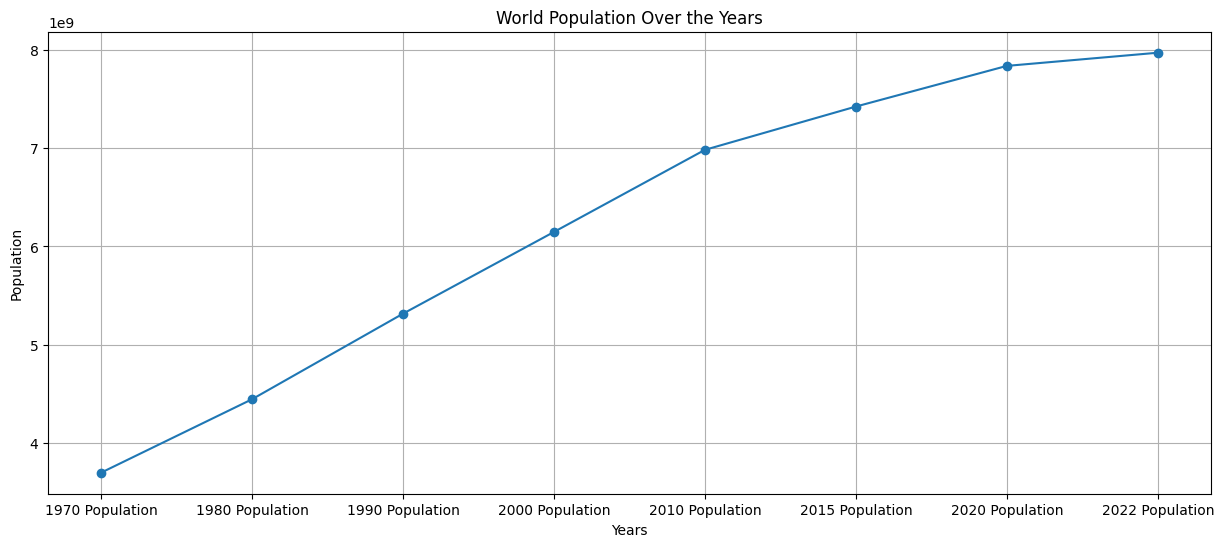

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
labels = columns_reversed #{columns_reversed = columns[::-1]} using this code for reversing the column's names
world_population_filtered = [world_population[columns.index(year)] for year in columns_reversed]
plt.plot(labels, world_population_filtered, marker='o', linestyle='-')
plt.xlabel('Years')
plt.ylabel('Population')
plt.grid()
plt.title('World Population Over the Years')
plt.show()

The population has experienced a significant increase from 1970 to 2022.

In [16]:
current_pop=sum(df['2022 Population'])

In [17]:
growth_rate=[]
for year in columns:
    growth_rate.append((current_pop-sum(df[year]))/sum(df[year])*100)

In [18]:
growth_rate

[0.0,
 1.711419187806771,
 7.388785688242498,
 14.170368135379416,
 29.711091410944384,
 50.039997512961364,
 79.484341259524,
 115.83968796220991]

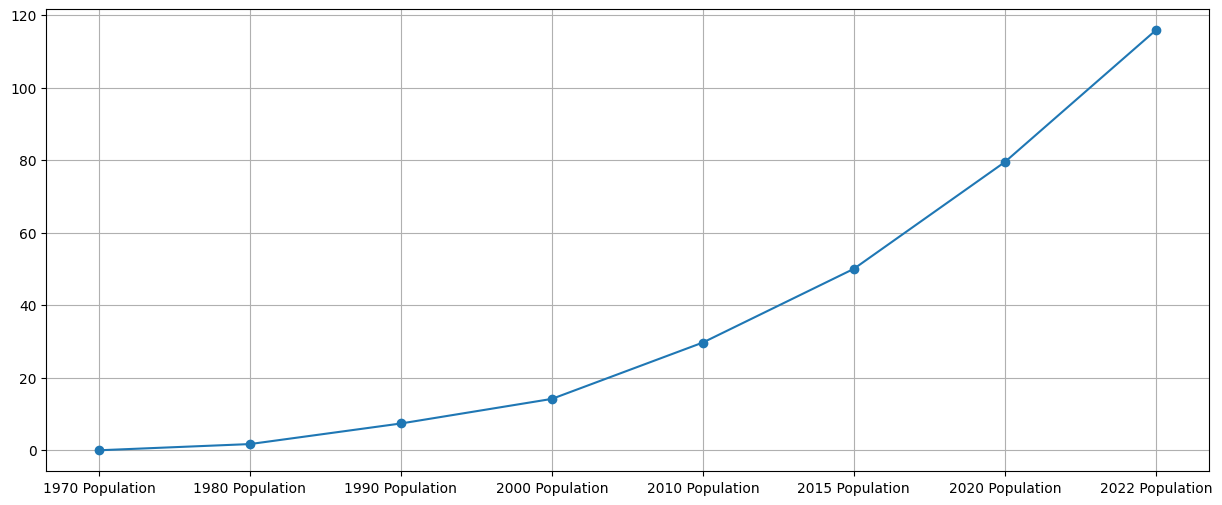

In [19]:
plt.figure(figsize=(15,6))
plt.plot(labels, growth_rate, marker='o', linestyle='-')
plt.grid()
plt.show()

World Population growth rate changed.

In [20]:
max_density_country = df.loc[df['Density (per km²)'].idxmax()]['Country/Territory']
max_density = df['Density (per km²)'].max()
print("Maximum population density is in " + str(max_density_country))
print("The maximum population density is " + str(max_density))

Maximum population density is in Macau
The maximum population density is 23172.2667


Macau has the most people living closely together. They have about 23,172 people in every square kilometer.

In [21]:
min_density_country = df.loc[df['Density (per km²)'].idxmin()]['Country/Territory']
min_density = df['Density (per km²)'].min()
print("Minimum population density is in " + str(min_density_country))
print("The minimum population density is " + str(min_density))

Minimum population density is in Greenland
The minimum population density is 0.0261


Greenland has the lowest number of people living close together. The lowest population density is 0.0261.

In [22]:
max_growth_rate_country = df.loc[df['Growth Rate'].idxmax()]['Country/Territory']
max_growth_rate = df['Growth Rate'].max()
print("Maximum population growth rate is in " + max_growth_rate_country)
print("The maximum Growth Rate is " + str(max_growth_rate))

Maximum population growth rate is in Moldova
The maximum Growth Rate is 1.0691


Moldova has the highest population growth rate, which is 1.0691.

In [23]:
min_growth_rate_country = df.loc[df['Growth Rate'].idxmin()]['Country/Territory']
min_growth_rate = df['Growth Rate'].min()
print("Minimum population growth rate is in " + min_growth_rate_country)
print("The minimum Growth Rate is " + str(min_growth_rate))

Minimum population growth rate is in Ukraine
The minimum Growth Rate is 0.912


In Ukraine, the population is growing the slowest, with a rate of 0.912.

In [24]:
max_area_country = df.loc[df['Area (km²)'].idxmax()]['Country/Territory']
max_area_rate = df['Area (km²)'].max()
print("Maximum Area country is " + str(max_area_country))
print("The maximum Area is " + str(max_area_rate))

Maximum Area country is Russia
The maximum Area is 17098242


Russia is the largest country, with an area of 17,098,242 square kilometers.

In [25]:
min_area_country = df.loc[df['Area (km²)'].idxmin()]['Country/Territory']
min_area_rate = df['Area (km²)'].min()
print("Minimum Area country is " + str(min_area_country))
print("The minimum Area is " + str(min_area_rate))

Minimum Area country is Vatican City
The minimum Area is 1


Vatican City is the smallest country, with an area of just 1 square kilometer.

In [26]:
group_Continent = df.groupby('Continent').agg({'2022 Population':'sum','2020 Population':'sum','2015 Population':'sum','2010 Population':'sum','2000 Population':'sum','1990 Population':'sum','1980 Population':'sum','1970 Population':'sum'})

In [27]:
group_Continent = group_Continent.reset_index()

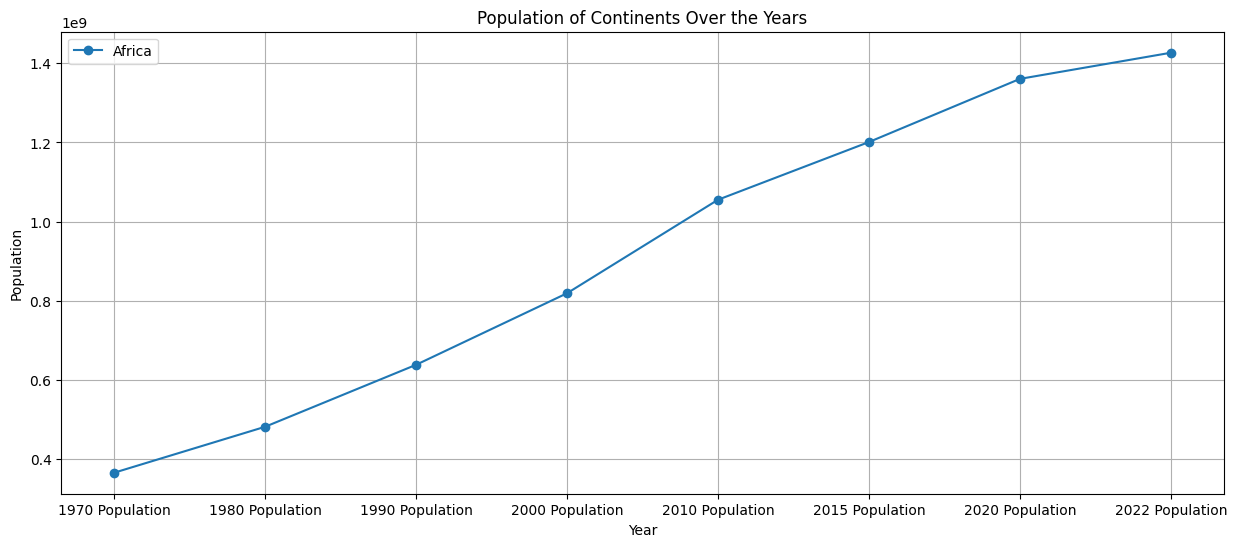

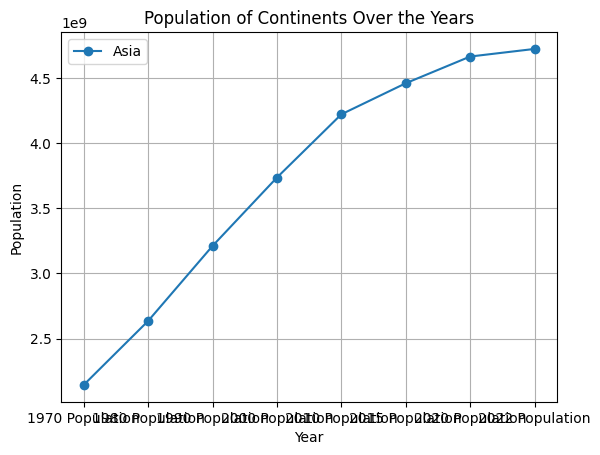

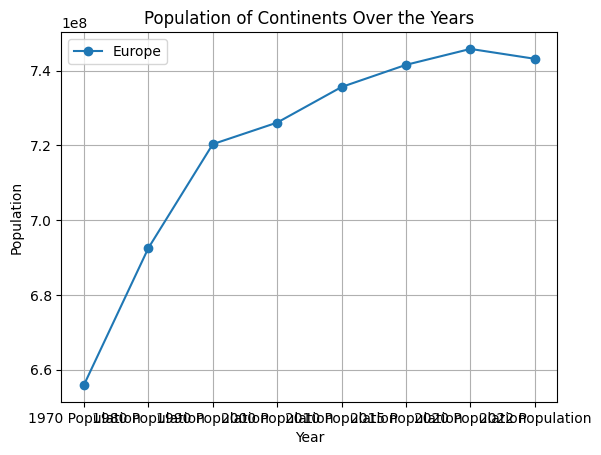

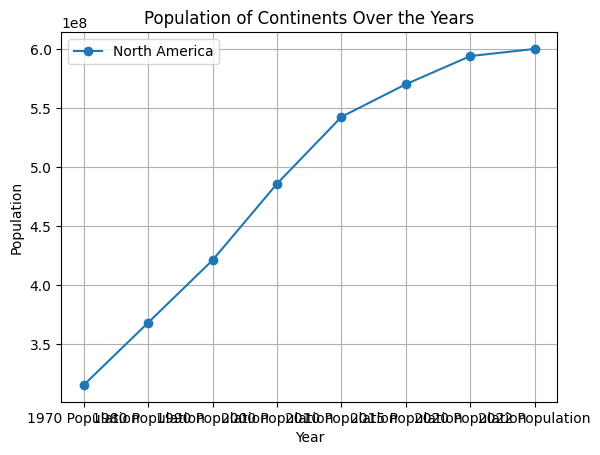

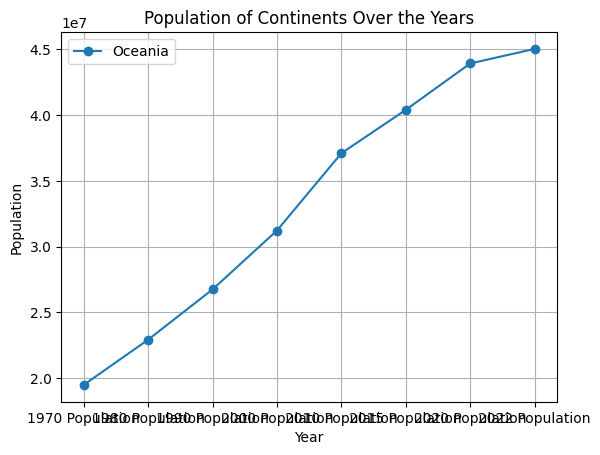

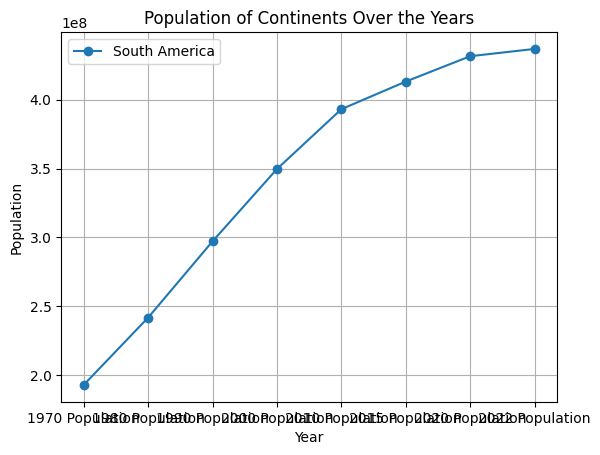

In [28]:
continents = group_Continent['Continent']
years = group_Continent.columns[1:]
plt.figure(figsize=(15,6))
for i, continent in enumerate(continents):
    data_row = group_Continent.iloc[i,1:][::-1]
    plt.plot(years[::-1],data_row,label=continent,marker='o')
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.title('Population of Continents Over the Years')
    plt.legend()
    plt.grid()
    plt.show()

In [29]:
#group the dataframe by continent

group_Continent_by_density = df.groupby('Continent').agg({'2022 Population':'sum','Area (km²)':'sum'}).reset_index()

In [30]:
#make new column for continent density

group_Continent_by_density['Continent Density'] = group_Continent_by_density['2022 Population'] / group_Continent_by_density['Area (km²)'].reset_index(drop=True)

In [31]:
group_Continent_by_density

,Continent,2022 Population,Area (km²),Continent Density
0,Africa,1426730932,30317963,47.058931
1,Asia,4721383274,32138141,146.909035
2,Europe,743147538,23010411,32.296144
3,North America,600296136,24244178,24.760424
4,Oceania,45038554,8515081,5.289269
5,South America,436816608,17833382,24.494322


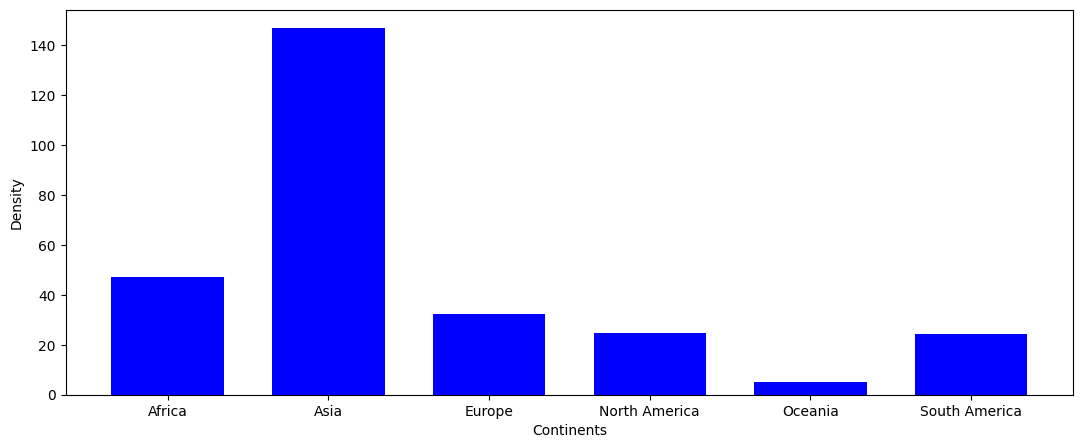

In [32]:
plt.figure(figsize=(13,5))
plt.bar(group_Continent_by_density['Continent'],group_Continent_by_density['Continent Density'],width=0.7,color='b')
plt.xlabel('Continents')
plt.ylabel('Density')
plt.show()

Continents with density of population per square kilometer.

In [34]:
group_Continent_by_percentage = df.groupby('Continent').agg({'World Population Percentage':'sum'}).reset_index

In [35]:
group_Continent_by_percentage

<bound method DataFrame.reset_index of                World Population Percentage
Continent                                 
Africa                               17.87
Asia                                 59.19
Europe                                9.33
North America                         7.51
Oceania                               0.55
South America                         5.48>

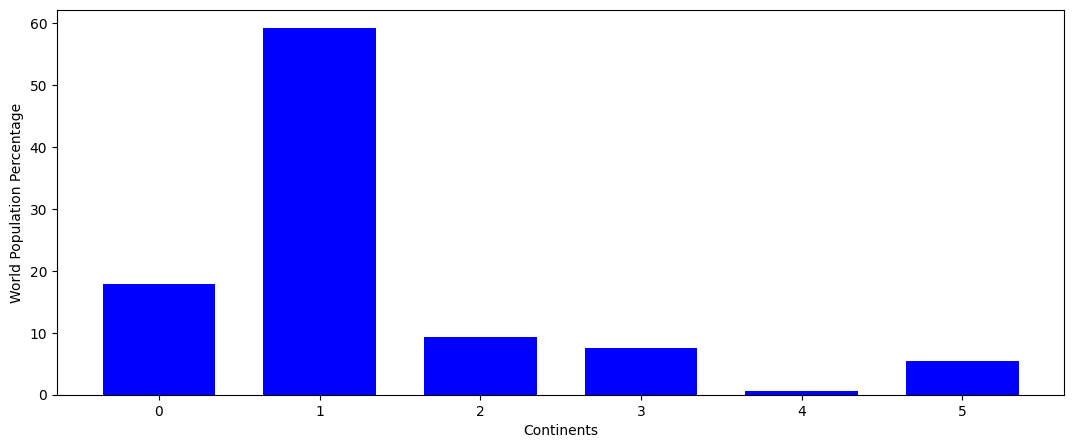

In [38]:
group_Continent_by_percentage_df = group_Continent_by_percentage()

plt.figure(figsize=(13, 5))
plt.bar(group_Continent_by_percentage_df.index, group_Continent_by_percentage_df['World Population Percentage'], width=0.7, color='b')
plt.xlabel('Continents')
plt.ylabel('World Population Percentage')
plt.show()

Continents with World Population Percentage.

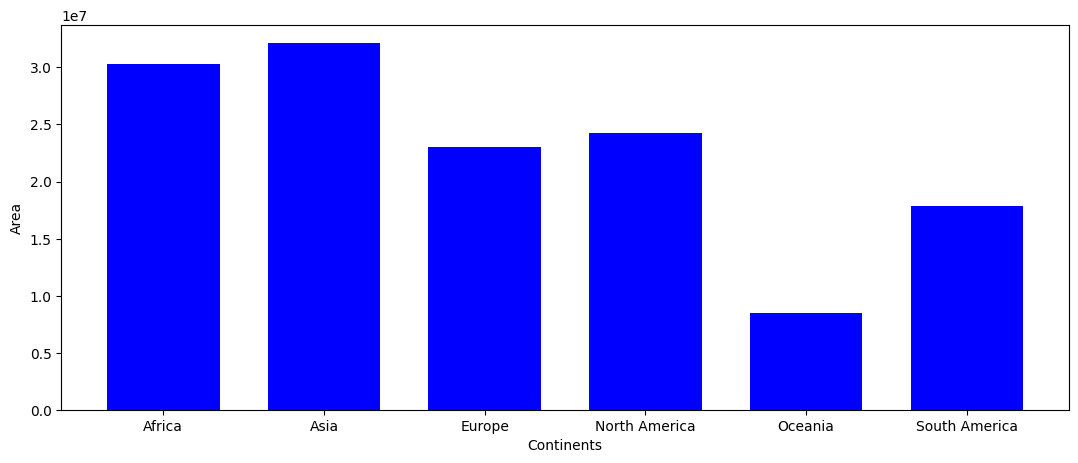

In [40]:
plt.figure(figsize=(13,5))
plt.bar(group_Continent_by_density['Continent'],group_Continent_by_density['Area (km²)'], width=0.7, color='b')
plt.xlabel('Continents')
plt.ylabel('Area')
plt.show()

Continents with Area per square kilometer.

In [76]:
df_growth_rate_top_countries = df_1st_five1[['Country/Territory', 'Growth Rate']]

In [77]:
df_growth_rate_top_countries

,Country/Territory,Growth Rate
0,China,1.0000
1,India,1.0068
2,United States,1.0038
3,Indonesia,1.0064
4,Pakistan,1.0191


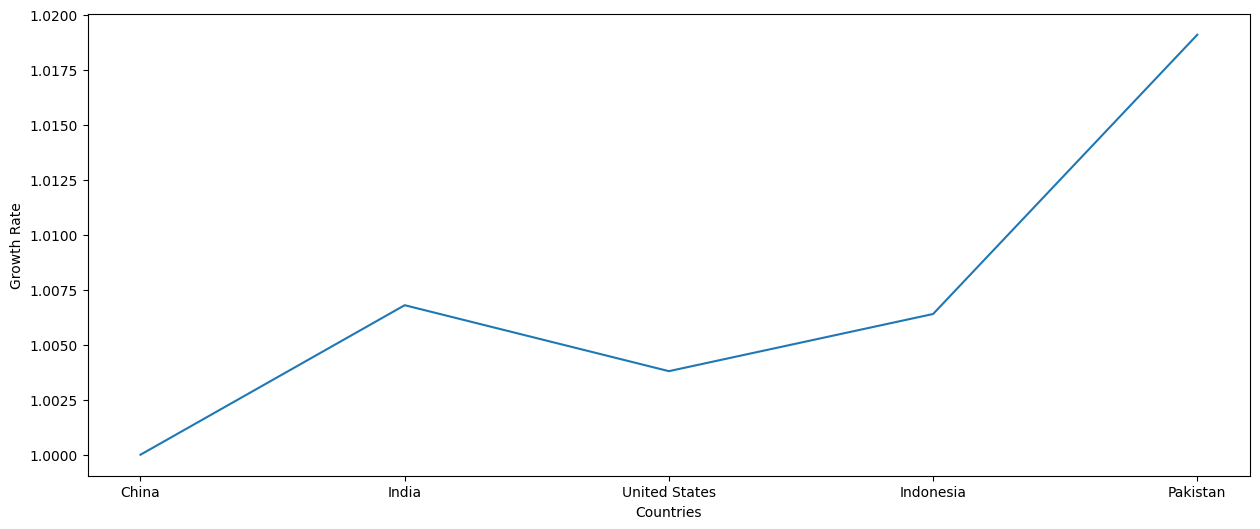

In [79]:
plt.figure(figsize=(15,6))
plt.plot(df_growth_rate_top_countries['Country/Territory'],df_growth_rate_top_countries['Growth Rate'])
plt.xlabel('Countries')
plt.ylabel('Growth Rate')
plt.show()